In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("datasets/spam.xlsx")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4062,ham,How are you. Its been ages. How's abj,NaN,NaN,NaN
3061,ham,Fine. Do you remember me.,NaN,NaN,NaN
1601,ham,Carlos is taking his sweet time as usual so le...,NaN,NaN,NaN
5205,spam,Had your mobile 11mths ? Update for FREE to Or...,NaN,NaN,NaN
4921,ham,Hi Dear Call me its urgnt. I don't know whats ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# rename columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# duplicated values

df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

In [15]:
from sklearn.preprocessing import LabelEncoder
encoded=LabelEncoder()

In [16]:
df['target']=encoded.fit_transform(df['target'])

In [17]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [18]:
df['target'].value_counts()           # imbalance data 

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
# EDA

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

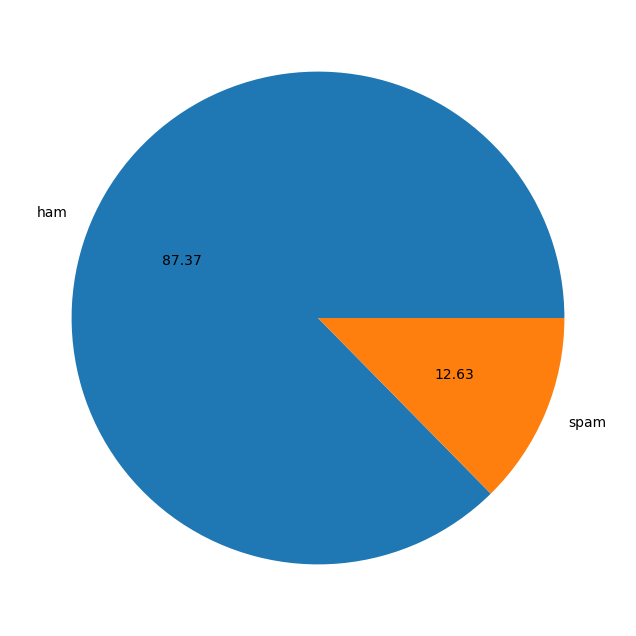

In [23]:
plt.figure(figsize=(10,8))
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [24]:
# insight : data is imbalance

In [25]:
df


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wasim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['text']=df['text'].apply(lambda x: str(x))             # all row are not string thats why i convert into string

In [29]:
df['num_characters']=df['text'].apply(len)

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
s=("my name is wasim akhtar. and i love data science")
len(s.split(" "))
# but we use nltk for counting fullstop ,comma 

10

In [32]:
print(nltk.word_tokenize(s))

['my', 'name', 'is', 'wasim', 'akhtar', '.', 'and', 'i', 'love', 'data', 'science']


In [33]:
print(nltk.sent_tokenize(s))

['my name is wasim akhtar.', 'and i love data science']


In [34]:
# num of words

df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
df['num_sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [37]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [38]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.455794,1.965564
std,58.239404,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# ham

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.123782,1.820195
std,56.362288,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# spam

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

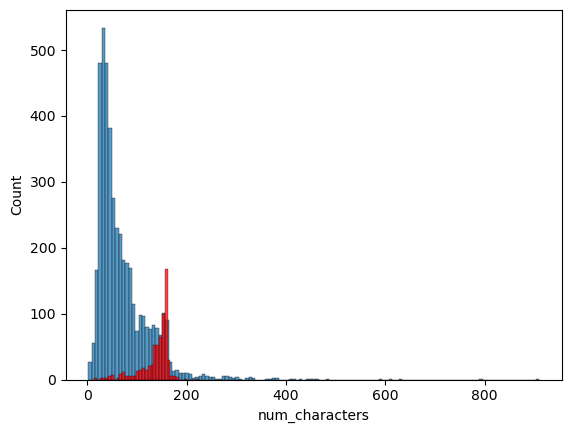

In [41]:
sns.histplot((df[df['target']==0])['num_characters'])    #ham

sns.histplot((df[df['target']==1])['num_characters'],color='red') #spam

<Axes: xlabel='num_words', ylabel='Count'>

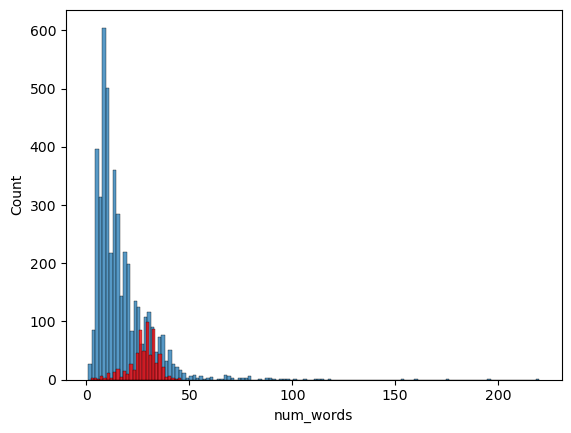

In [42]:
sns.histplot((df[df['target']==0])['num_words'])    #ham

sns.histplot((df[df['target']==1])['num_words'],color='red') #spam

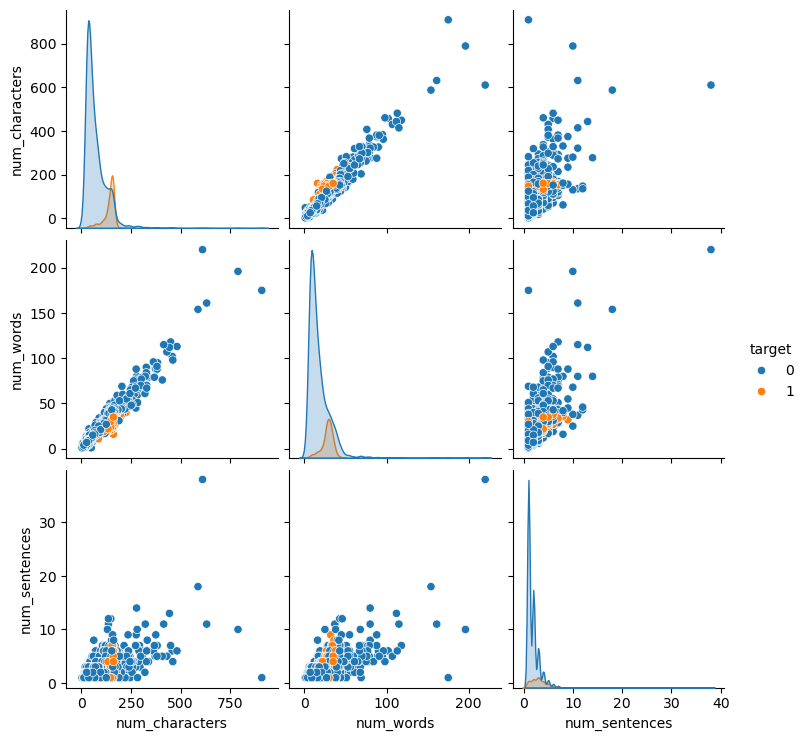

In [43]:
sns.pairplot(df,hue='target')

In [44]:
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384681,0.262912,0.263939
num_characters,0.384681,1.000000,0.965775,0.624148
num_words,0.262912,0.965775,1.000000,0.679971
num_sentences,0.263939,0.624148,0.679971,1.000000


<Axes: >

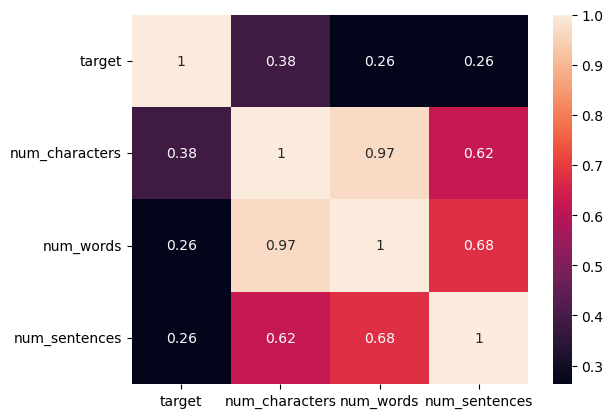

In [45]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [46]:
# Data preprocessing 
# lower cases
# tokenization
# removing sepecial character
# removing stop word and punchuation
# stemming

In [47]:
# pip install nltk

In [48]:
from nltk.corpus import stopwords

In [49]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wasim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [53]:
def transform_text(text):
    
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    
    return " ".join(y)
    

In [54]:
transform_text('hii i AM wasim akhtar  20%  %%,hii How are you wasim?')  # remove special character

'hii wasim akhtar 20 hii wasim'

In [55]:
df['transformed_text']=df['text'].apply(transform_text)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
# !pip install wordcloud

In [58]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [59]:
spam_wc=wc.generate(df[df['target']==1 ]['transformed_text'].str.cat(sep=" "))

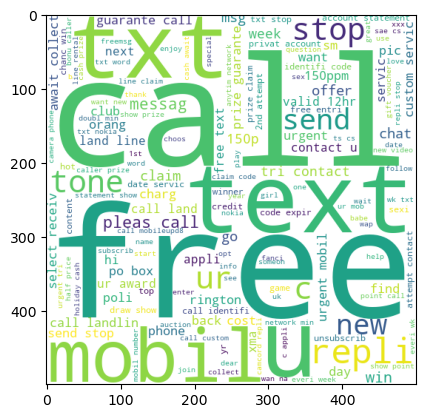

In [60]:
plt.imshow(spam_wc)

In [61]:
ham_wc=wc.generate(df[df['target']==0 ]['transformed_text'].str.cat(sep=" "))

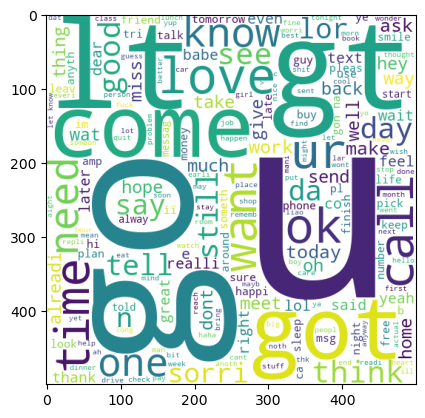

In [62]:
plt.imshow(ham_wc)

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
        for word in msg.split():
            spam_corpus.append(word)
        
        

In [65]:
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [66]:
len(spam_corpus)

9939

In [70]:
from collections import Counter

In [71]:
spam_30_word=pd.DataFrame(Counter(spam_corpus).most_common(30))
spam_30_word.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


Text(0.5, 0, 'count')

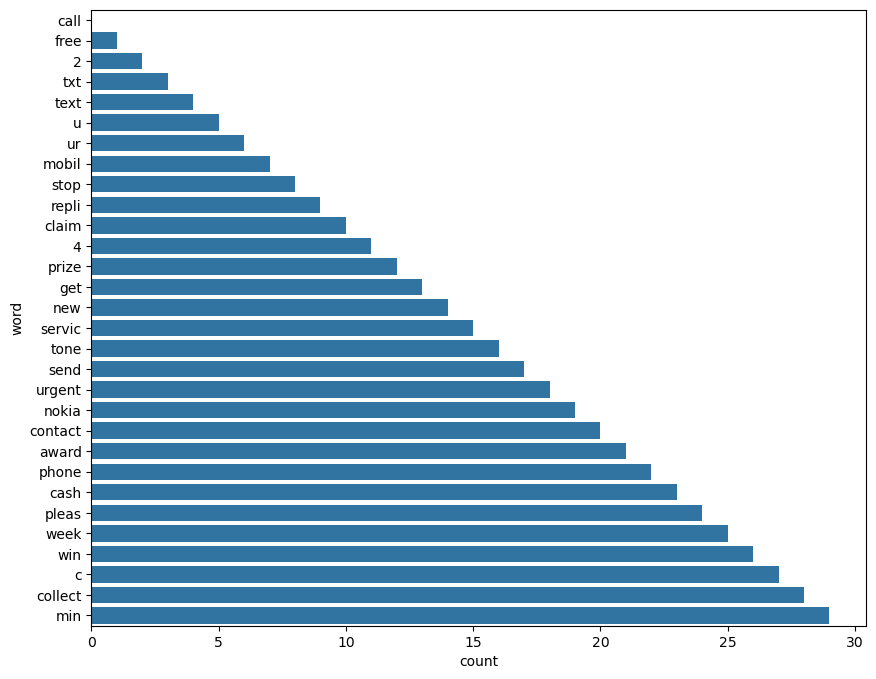

In [72]:
from collections import Counter
plt.figure(figsize=(10,8))
sns.barplot(spam_30_word[0])
plt.ylabel("word")
plt.xlabel("count")

In [73]:
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
        for word in msg.split():
            ham_corpus.append(word)
        
        

In [74]:
pd.DataFrame(Counter(spam_corpus).most_common(30)).head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


Text(0.5, 0, 'count')

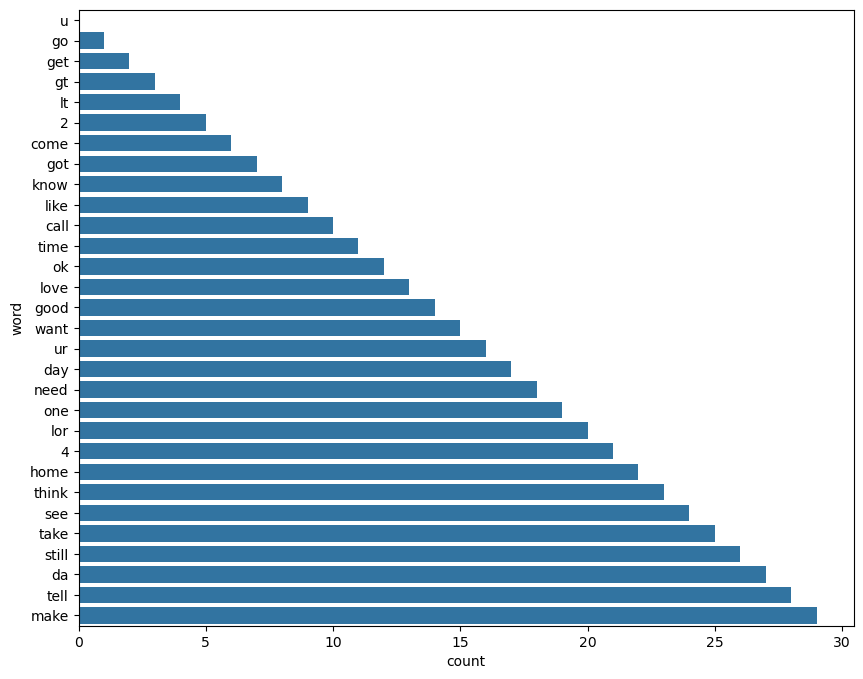

In [75]:
from collections import Counter
plt.figure(figsize=(10,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.ylabel("word")
plt.xlabel("count")

In [76]:
# model building

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

In [78]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [79]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
X.shape

(5169, 6708)

In [81]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [82]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [83]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [84]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [85]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [86]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [87]:
bnb.fit(X_train,y_train)                           # good score based of countvectorizer
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.5315315315315315


In [88]:
# using tfidfvectorizer

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()

X=tfidf.fit_transform(df['transformed_text']).toarray()

In [90]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [92]:
mnb.fit(X_train,y_train)                               # good score based on TfidfVectorizer
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [93]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [94]:
# tfidf --> mnb

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [96]:
lrc=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
Mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [97]:
clfs={
    "LRC":lrc,
    "SVC":svc,
    "MNB":mnb,
    "DTC":dtc,
    "KNC":knc,
    "RFC":rfc,
    "ABC":abc,
    "BC":bc,
    "ETC":etc,
    "GBC":gbc,
    "XGB":xgb,
}

In [98]:
from sklearn.metrics import accuracy_score,precision_score

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [99]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

(0.9516441005802708, 0.94)

In [100]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("for ",name)
    print("accuracy -",current_accuracy)
    print("precision -",current_precision)

    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  LRC
accuracy - 0.9516441005802708
precision - 0.94
for  SVC
accuracy - 0.9729206963249516
precision - 0.9741379310344828
for  MNB
accuracy - 0.9593810444874274
precision - 1.0
for  DTC
accuracy - 0.9352030947775629
precision - 0.8380952380952381
for  KNC
accuracy - 0.9003868471953579
precision - 1.0
for  RFC
accuracy - 0.971953578336557
precision - 0.990990990990991
for  ABC
accuracy - 0.9622823984526112
precision - 0.9541284403669725
for  BC
accuracy - 0.960348162475822
precision - 0.8646616541353384
for  ETC
accuracy - 0.9758220502901354
precision - 0.9829059829059829
for  GBC
accuracy - 0.9526112185686654
precision - 0.9238095238095239
for  XGB
accuracy - 0.9729206963249516
precision - 0.9435483870967742


In [101]:
performace_df=pd.DataFrame({"Algorithm":clfs.keys(),"accuracy_scores":accuracy_scores,"precision_scores":precision_scores})
performace_df

,Algorithm,accuracy_scores,precision_scores
0,LRC,0.951644,0.940000
1,SVC,0.972921,0.974138
2,MNB,0.959381,1.000000
3,DTC,0.935203,0.838095
4,KNC,0.900387,1.000000
5,RFC,0.971954,0.990991
6,ABC,0.962282,0.954128
7,BC,0.960348,0.864662
8,ETC,0.975822,0.982906
9,GBC,0.952611,0.923810


In [102]:
performace_df.sort_values("precision_scores",ascending=False)

,Algorithm,accuracy_scores,precision_scores
2,MNB,0.959381,1.000000
4,KNC,0.900387,1.000000
5,RFC,0.971954,0.990991
8,ETC,0.975822,0.982906
1,SVC,0.972921,0.974138
6,ABC,0.962282,0.954128
10,XGB,0.972921,0.943548
0,LRC,0.951644,0.940000
9,GBC,0.952611,0.923810
7,BC,0.960348,0.864662


In [103]:
performace_df1=pd.melt(performace_df,id_vars="Algorithm")
performace_df1

,Algorithm,variable,value
0,LRC,accuracy_scores,0.951644
1,SVC,accuracy_scores,0.972921
2,MNB,accuracy_scores,0.959381
3,DTC,accuracy_scores,0.935203
4,KNC,accuracy_scores,0.900387
5,RFC,accuracy_scores,0.971954
6,ABC,accuracy_scores,0.962282
7,BC,accuracy_scores,0.960348
8,ETC,accuracy_scores,0.975822
9,GBC,accuracy_scores,0.952611


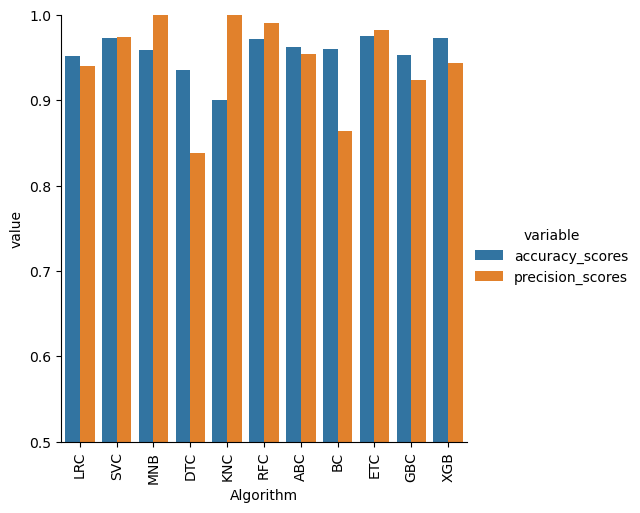

In [104]:
sns.catplot(x="Algorithm" , y="value",hue="variable",data=performace_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [105]:
# model emprovement

In [181]:
# changes the max features parameter of ifidf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=3000)

X=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


lrc=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
Mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


clfs={
    "LRC":lrc,
    "SVC":svc,
    "MNB":mnb,
    "DTC":dtc,
    "KNC":knc,
    "RFC":rfc,
    "ABC":abc,
    "BC":bc,
    "ETC":etc,
    "GBC":gbc,
    "XGB":xgb,
}

from sklearn.metrics import accuracy_score,precision_score

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [183]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("for ",name)
    print("accuracy -",current_accuracy)
    print("precision -",current_precision)

    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



for  LRC
accuracy - 0.9574468085106383
precision - 0.97
for  SVC
accuracy - 0.9748549323017408
precision - 0.9745762711864406
for  MNB
accuracy - 0.971953578336557
precision - 1.0
for  DTC
accuracy - 0.9323017408123792
precision - 0.8469387755102041
for  KNC
accuracy - 0.9052224371373307
precision - 1.0
for  RFC
accuracy - 0.9709864603481625
precision - 0.9655172413793104
for  ABC
accuracy - 0.960348162475822
precision - 0.9369369369369369
for  BC
accuracy - 0.9564796905222437
precision - 0.8604651162790697
for  ETC
accuracy - 0.9806576402321083
precision - 0.9836065573770492
for  GBC
accuracy - 0.9487427466150871
precision - 0.9292929292929293
for  XGB
accuracy - 0.9661508704061895
precision - 0.9401709401709402


In [186]:
performace_df["accuracy_max_ft_3000"]=accuracy_scores
performace_df["precision_max_ft_3000"]=precision_scores

performace_df

,Algorithm,accuracy_scores,precision_scores,accuracy_max_ft_3000,precision_max_ft_3000,accuracy_scalling,precision_scalling
0,LRC,0.951644,0.940000,0.957447,0.970000,0.967118,0.964286
1,SVC,0.972921,0.974138,0.974855,0.974576,0.973888,0.944000
2,MNB,0.959381,1.000000,0.971954,1.000000,0.978723,0.946154
3,DTC,0.935203,0.838095,0.932302,0.846939,0.933269,0.855670
4,KNC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
5,RFC,0.971954,0.990991,0.970986,0.965517,0.970986,0.965517
6,ABC,0.962282,0.954128,0.960348,0.936937,0.960348,0.936937
7,BC,0.960348,0.864662,0.956480,0.860465,0.956480,0.860465
8,ETC,0.975822,0.982906,0.980658,0.983607,0.980658,0.983607
9,GBC,0.952611,0.923810,0.948743,0.929293,0.948743,0.929293


In [185]:
performace_df.sort_values("precision_max_ft_3000",ascending=False)

,Algorithm,accuracy_scores,precision_scores,accuracy_max_ft_3000,precision_max_ft_3000,accuracy_scalling,precision_scalling
2,MNB,0.959381,1.000000,0.971954,1.000000,0.978723,0.946154
4,KNC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
8,ETC,0.975822,0.982906,0.980658,0.983607,0.980658,0.983607
1,SVC,0.972921,0.974138,0.974855,0.974576,0.973888,0.944000
0,LRC,0.951644,0.940000,0.957447,0.970000,0.967118,0.964286
5,RFC,0.971954,0.990991,0.970986,0.965517,0.970986,0.965517
10,XGB,0.972921,0.943548,0.966151,0.940171,0.966151,0.940171
6,ABC,0.962282,0.954128,0.960348,0.936937,0.960348,0.936937
9,GBC,0.952611,0.923810,0.948743,0.929293,0.948743,0.929293
7,BC,0.960348,0.864662,0.956480,0.860465,0.956480,0.860465


In [142]:
performace_df1=pd.melt(performace_df,id_vars="Algorithm")
performace_df1

,Algorithm,variable,value
0,LRC,accuracy_scores,0.951644
1,SVC,accuracy_scores,0.972921
2,MNB,accuracy_scores,0.959381
3,DTC,accuracy_scores,0.935203
4,KNC,accuracy_scores,0.900387
5,RFC,accuracy_scores,0.971954
6,ABC,accuracy_scores,0.962282
7,BC,accuracy_scores,0.960348
8,ETC,accuracy_scores,0.975822
9,GBC,accuracy_scores,0.952611


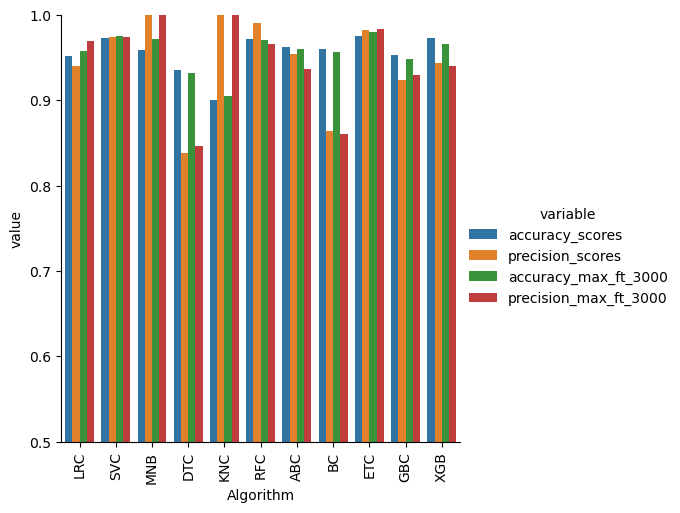

In [143]:
sns.catplot(x="Algorithm" , y="value",hue="variable",data=performace_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [144]:
# naive bayes is good alogrigthm 

In [ ]:
# we scalling the data try to increase accuracy of model

In [145]:
# changes the max features parameter of ifidf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=3000)

X=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values


In [146]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [147]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


lrc=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
Mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


clfs={
    "LRC":lrc,
    "SVC":svc,
    "MNB":mnb,
    "DTC":dtc,
    "KNC":knc,
    "RFC":rfc,
    "ABC":abc,
    "BC":bc,
    "ETC":etc,
    "GBC":gbc,
    "XGB":xgb,
}

from sklearn.metrics import accuracy_score,precision_score

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [150]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("for ",name)
    print("accuracy -",current_accuracy)
    print("precision -",current_precision)

    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



for  LRC
accuracy - 0.9671179883945842
precision - 0.9642857142857143
for  SVC
accuracy - 0.9738878143133463
precision - 0.944
for  MNB
accuracy - 0.9787234042553191
precision - 0.9461538461538461
for  DTC
accuracy - 0.9332688588007737
precision - 0.8556701030927835
for  KNC
accuracy - 0.9052224371373307
precision - 0.9761904761904762
for  RFC
accuracy - 0.9709864603481625
precision - 0.9655172413793104
for  ABC
accuracy - 0.960348162475822
precision - 0.9369369369369369
for  BC
accuracy - 0.9564796905222437
precision - 0.8604651162790697
for  ETC
accuracy - 0.9806576402321083
precision - 0.9836065573770492
for  GBC
accuracy - 0.9487427466150871
precision - 0.9292929292929293
for  XGB
accuracy - 0.9661508704061895
precision - 0.9401709401709402


In [152]:
performace_df["accuracy_scalling"]=accuracy_scores
performace_df["precision_scalling"]=precision_scores

performace_df

,Algorithm,accuracy_scores,precision_scores,accuracy_max_ft_3000,precision_max_ft_3000,accuracy_scalling,precision_scalling
0,LRC,0.951644,0.940000,0.957447,0.970000,0.967118,0.964286
1,SVC,0.972921,0.974138,0.974855,0.974576,0.973888,0.944000
2,MNB,0.959381,1.000000,0.971954,1.000000,0.978723,0.946154
3,DTC,0.935203,0.838095,0.932302,0.846939,0.933269,0.855670
4,KNC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
5,RFC,0.971954,0.990991,0.970986,0.965517,0.970986,0.965517
6,ABC,0.962282,0.954128,0.960348,0.936937,0.960348,0.936937
7,BC,0.960348,0.864662,0.956480,0.860465,0.956480,0.860465
8,ETC,0.975822,0.982906,0.980658,0.983607,0.980658,0.983607
9,GBC,0.952611,0.923810,0.948743,0.929293,0.948743,0.929293


In [153]:
performace_df.sort_values("precision_scalling",ascending=False)

,Algorithm,accuracy_scores,precision_scores,accuracy_max_ft_3000,precision_max_ft_3000,accuracy_scalling,precision_scalling
8,ETC,0.975822,0.982906,0.980658,0.983607,0.980658,0.983607
4,KNC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
5,RFC,0.971954,0.990991,0.970986,0.965517,0.970986,0.965517
0,LRC,0.951644,0.940000,0.957447,0.970000,0.967118,0.964286
2,MNB,0.959381,1.000000,0.971954,1.000000,0.978723,0.946154
1,SVC,0.972921,0.974138,0.974855,0.974576,0.973888,0.944000
10,XGB,0.972921,0.943548,0.966151,0.940171,0.966151,0.940171
6,ABC,0.962282,0.954128,0.960348,0.936937,0.960348,0.936937
9,GBC,0.952611,0.923810,0.948743,0.929293,0.948743,0.929293
7,BC,0.960348,0.864662,0.956480,0.860465,0.956480,0.860465


In [154]:
performace_df1=pd.melt(performace_df,id_vars="Algorithm")
performace_df1

,Algorithm,variable,value
0,LRC,accuracy_scores,0.951644
1,SVC,accuracy_scores,0.972921
2,MNB,accuracy_scores,0.959381
3,DTC,accuracy_scores,0.935203
4,KNC,accuracy_scores,0.900387
...,...,...,...
61,ABC,precision_scalling,0.936937
62,BC,precision_scalling,0.860465
63,ETC,precision_scalling,0.983607
64,GBC,precision_scalling,0.929293


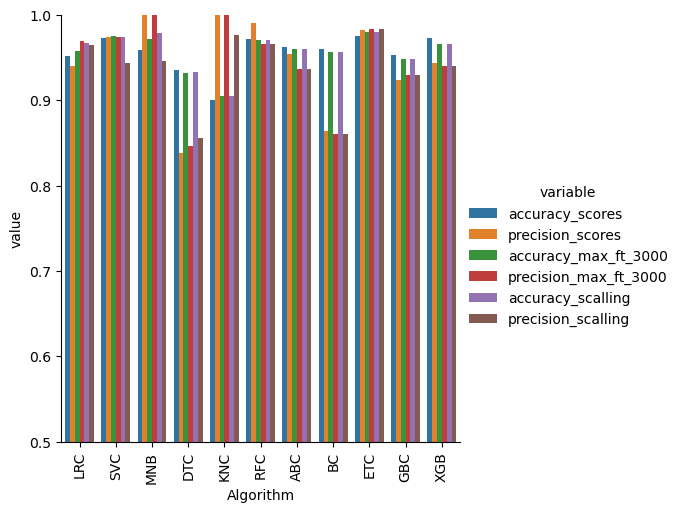

In [161]:
sns.catplot(x="Algorithm" , y="value",hue="variable",data=performace_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [162]:
# before scalling naive bayes is good accuracy algorithm

In [164]:
# votting classifier

In [165]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

In [166]:
from sklearn.ensemble import VotingClassifier

vc=VotingClassifier(estimators=[('svm',svc),('mnb',mnb),('et',etc)],voting='soft')

In [167]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [170]:
y_pred=vc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9816247582205029
0.968503937007874


In [171]:
 # applying stacking

In [175]:
estimators=[('svm',svc),('mnb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [173]:
from sklearn.ensemble import StackingClassifier

In [176]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [177]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9796905222437138
0.9465648854961832


In [188]:
# WE SELECT BEST MODEL

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=3000)

X=tfidf.fit_transform(df['transformed_text']).toarray()

y=df['target'].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [203]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[790 106]
 [ 26 112]]
0.5137614678899083


In [204]:
mnb.fit(X_train,y_train)                                       # good score based of tfidf
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [206]:
bnb.fit(X_train,y_train)                         
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred1))

0.9825918762088974
[[895   1]
 [ 17 121]]
0.5137614678899083


In [207]:
import pickle

In [210]:
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))